In [1]:
import pandas as pd
import os
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Populating the interactive namespace from numpy and matplotlib


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
btc = pd.read_csv('datasets/btc.csv')

In [4]:
X = btc.columns

In [5]:
len(X)

144

In [6]:
CorrMatrix = btc.corr()

In [7]:
CorrMatrix

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,1.000000,-0.295957,0.959652,0.932884,0.108487,0.934049,0.945186,-0.154716,0.688873,0.937239,...,0.969170,0.415725,0.620344,-0.149944,0.471445,-0.093965,0.816682,-0.101739,-0.504837,-0.255180
AdrBal1in100KCnt,-0.295957,1.000000,-0.311911,-0.254478,-0.331607,-0.398082,-0.275746,-0.163269,-0.459963,-0.252451,...,-0.317946,-0.382872,-0.059261,0.196454,-0.053100,0.098166,-0.106880,-0.328383,-0.649076,0.107336
AdrBal1in100MCnt,0.959652,-0.311911,1.000000,0.978567,0.110501,0.964173,0.991210,-0.160749,0.705385,0.973496,...,0.936033,0.342639,0.596460,-0.158842,0.467595,-0.100729,0.784030,-0.133679,-0.485315,-0.270235
AdrBal1in10BCnt,0.932884,-0.254478,0.978567,1.000000,0.108065,0.895520,0.996777,-0.190684,0.583663,0.997028,...,0.891673,0.260677,0.683952,-0.128747,0.530808,-0.080340,0.810682,-0.218496,-0.405083,-0.215870
AdrBal1in10KCnt,0.108487,-0.331607,0.110501,0.108065,1.000000,0.109859,0.108865,-0.061891,0.036024,0.107419,...,0.110097,0.072873,0.309664,-0.113349,0.229333,-0.057074,0.357296,0.058248,-0.421704,-0.332325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,-0.093965,0.098166,-0.100729,-0.080340,-0.057074,-0.138490,-0.087445,-0.144013,-0.239874,-0.079789,...,-0.101216,-0.120343,-0.067188,0.934852,-0.058092,1.000000,-0.101490,-0.099275,0.518596,0.123766
TxTfrValMedUSD,0.816682,-0.106880,0.784030,0.810682,0.357296,0.710752,0.803434,-0.503479,0.451780,0.820305,...,0.745514,0.126008,0.647192,-0.211772,0.501146,-0.101490,1.000000,-0.326634,-0.202220,-0.050680
VelCur1yr,-0.101739,-0.328383,-0.133679,-0.218496,0.058248,0.015809,-0.191981,0.237018,0.354171,-0.204888,...,-0.056968,0.484088,-0.284704,-0.133374,-0.204912,-0.099275,-0.326634,1.000000,0.039563,-0.066300
VtyDayRet180d,-0.504837,-0.649076,-0.485315,-0.405083,-0.421704,-0.584099,-0.432093,0.600602,-0.703672,-0.404610,...,-0.562346,-0.288359,-0.200798,0.316258,-0.149444,0.518596,-0.202220,0.039563,1.000000,0.580388


In [8]:
CorrMatrix['PriceUSD']

AdrActCnt           0.678202
AdrBal1in100KCnt   -0.068116
AdrBal1in100MCnt    0.675125
AdrBal1in10BCnt     0.769321
AdrBal1in10KCnt     0.378985
                      ...   
TxTfrValMedNtv     -0.076248
TxTfrValMedUSD      0.723620
VelCur1yr          -0.347565
VtyDayRet180d      -0.215754
VtyDayRet30d       -0.100315
Name: PriceUSD, Length: 143, dtype: float64

In [9]:
CorrMatrix = CorrMatrix[abs(CorrMatrix['PriceUSD'])>= 0.5]

In [10]:
CorrMatrix['AdrBal1in100KCnt']

AdrActCnt             -0.295957
AdrBal1in100MCnt      -0.311911
AdrBal1in10BCnt       -0.254478
AdrBal1in10MCnt       -0.398082
AdrBal1in1BCnt        -0.275746
                         ...   
SplyMiner1HopAllUSD   -0.069581
TxTfrCnt              -0.317946
TxTfrValAdjUSD        -0.059261
TxTfrValMeanUSD       -0.053100
TxTfrValMedUSD        -0.106880
Name: AdrBal1in100KCnt, Length: 77, dtype: float64

In [11]:
for el in CorrMatrix.columns:
    if el not in CorrMatrix.index:
        del CorrMatrix[el]

In [12]:
CorrMatrix

,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv1Cnt,...,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxTfrCnt,TxTfrValAdjUSD,TxTfrValMeanUSD,TxTfrValMedUSD
AdrActCnt,1.000000,0.959652,0.932884,0.934049,0.945186,0.937239,0.928103,0.944100,0.953823,0.954784,...,0.900213,0.853412,0.844231,0.679410,-0.022894,0.686367,0.969170,0.620344,0.471445,0.816682
AdrBal1in100MCnt,0.959652,1.000000,0.978567,0.964173,0.991210,0.973496,0.973594,0.988802,0.997059,0.990053,...,0.927219,0.883889,0.876528,0.676142,-0.009558,0.681569,0.936033,0.596460,0.467595,0.784030
AdrBal1in10BCnt,0.932884,0.978567,1.000000,0.895520,0.996777,0.997028,0.999592,0.998044,0.991216,0.944343,...,0.850554,0.801699,0.794089,0.770129,-0.077600,0.774616,0.891673,0.683952,0.530808,0.810682
AdrBal1in10MCnt,0.934049,0.964173,0.895520,1.000000,0.924100,0.890414,0.886737,0.917531,0.943153,0.991264,...,0.987330,0.964654,0.959320,0.556181,0.149604,0.562381,0.935112,0.486358,0.386907,0.710752
AdrBal1in1BCnt,0.945186,0.991210,0.996777,0.924100,1.000000,0.992123,0.994362,0.999710,0.998192,0.964921,...,0.880494,0.832960,0.825447,0.730715,-0.056711,0.735435,0.911087,0.648442,0.505271,0.803434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SplyMiner1HopAllUSD,0.686367,0.681569,0.774616,0.562381,0.735435,0.799257,0.789274,0.743690,0.717140,0.631329,...,0.562251,0.549392,0.558272,0.999066,-0.588502,1.000000,0.609830,0.868789,0.649163,0.733426
TxTfrCnt,0.969170,0.936033,0.891673,0.935112,0.911087,0.892654,0.885235,0.908139,0.924284,0.944372,...,0.910866,0.870070,0.860127,0.603598,0.012713,0.609830,1.000000,0.558256,0.420760,0.745514
TxTfrValAdjUSD,0.620344,0.596460,0.683952,0.486358,0.648442,0.714152,0.698508,0.656610,0.630066,0.549050,...,0.491936,0.479702,0.488847,0.877683,-0.550310,0.868789,0.558256,1.000000,0.767116,0.647192
TxTfrValMeanUSD,0.471445,0.467595,0.530808,0.386907,0.505271,0.557788,0.542399,0.511016,0.491325,0.432518,...,0.393160,0.382940,0.390821,0.657858,-0.442379,0.649163,0.420760,0.767116,1.000000,0.501146


In [13]:
CorrMatrix['PriceUSD']

AdrActCnt              0.678202
AdrBal1in100MCnt       0.675125
AdrBal1in10BCnt        0.769321
AdrBal1in10MCnt        0.555003
AdrBal1in1BCnt         0.729836
                         ...   
SplyMiner1HopAllUSD    0.999164
TxTfrCnt               0.602541
TxTfrValAdjUSD         0.877199
TxTfrValMeanUSD        0.657217
TxTfrValMedUSD         0.723620
Name: PriceUSD, Length: 77, dtype: float64

In [14]:
correlated_features = dict()
for feat1 in CorrMatrix.columns:
    if feat1 != "PriceUSD": 
        correlated_features[feat1] = []
        for feat2 in CorrMatrix.columns:
            if abs(CorrMatrix[feat1][feat2]) > 0.9 and feat1 != feat2:
                if feat1 != "PriceUSD" and feat2 != "PriceUSD":
                    correlated_features[feat1].append(feat2)

In [15]:
highlyCorrelated = list()
corSet = set()
for column in correlated_features.keys():
    maxCor = 0
    bestCor = None
    for el in correlated_features[column] + [column]:
        if abs(CorrMatrix['PriceUSD'][el]) > maxCor:
            maxCor = abs(CorrMatrix['PriceUSD'][el])
            bestCor = el
            
    highlyCorrelated.append(bestCor)
    corSet.add(bestCor)

In [16]:
len(list(corSet))

20

In [17]:
for el in list(corSet):
    print(el + " " + str(CorrMatrix['PriceUSD'][el]))

AdrBalCnt 0.7950820297103433
AdrBalNtv0.01Cnt 0.7381903889819359
AdrBalUSD10Cnt 0.895705238265752
FlowInExUSD 0.8442750392180502
AdrBal1in100MCnt 0.675125141724985
AssetEODCompletionTime 0.7089935032350656
TxTfrValMedUSD 0.7236200709974796
AdrBalUSD10MCnt 0.9973885100010248
SplyMiner0HopAllUSD 0.9999860941622307
TxTfrValMeanUSD 0.6572171551462382
FeeMeanUSD 0.5175432443311527
SplyAdrBalUSD10K 0.549062470115893
TxTfrValAdjUSD 0.8771991625686137
AdrBalUSD100Cnt 0.9355593452810728
SplyAdrBalUSD10M 0.8379066818868521
AdrBalUSD10KCnt 0.9821744354688466
SplyMiner1HopAllNtv -0.5902008967764314
AdrBalUSD1KCnt 0.9566186788363377
SplyAdrBalUSD1M 0.7867901509504597
SplyAdrBalUSD100K 0.6487983019587369


In [18]:
#"""""""""""""""""""""""""""""""""""""""""""""""

In [19]:
btc = btc[btc['PriceUSD'].isna() == False]

In [20]:
btc.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
555,2010-07-18,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,...,396.0,17180.55,1474.778412,48.783737,4.187596,1.850,0.158804,1.820565,NaN,NaN
556,2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,...,512.0,40243.73,3251.693384,86.951152,7.025653,2.625,0.212100,1.828863,NaN,NaN
557,2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,...,738.0,16063.23,1200.497201,42.528835,3.178423,1.375,0.102762,1.831412,NaN,NaN
558,2010-07-21,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,...,377.0,20834.15,1649.915979,71.822334,5.687816,18.500,1.465068,1.833749,NaN,NaN
559,2010-07-22,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,...,344.0,33049.03,1932.368865,112.714622,6.590397,1.010,0.059054,1.840245,NaN,NaN


In [21]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.085840
556,2010-07-19,0.080800
557,2010-07-20,0.074736
558,2010-07-21,0.079193
559,2010-07-22,0.058470


In [22]:
btc['PriceUSD'] = btc.PriceUSD.shift(-1) # shift price for 1 day
btc = btc[:-1] # remove the last row

In [23]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.080800
556,2010-07-19,0.074736
557,2010-07-20,0.079193
558,2010-07-21,0.058470
559,2010-07-22,0.060593


# Preprocessing part

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = btc[list(corSet)]
y = btc.PriceUSD

In [26]:
X.head()

,AdrBalCnt,AdrBalNtv0.01Cnt,AdrBalUSD10Cnt,FlowInExUSD,AdrBal1in100MCnt,AssetEODCompletionTime,TxTfrValMedUSD,AdrBalUSD10MCnt,SplyMiner0HopAllUSD,TxTfrValMeanUSD,FeeMeanUSD,SplyAdrBalUSD10K,TxTfrValAdjUSD,AdrBalUSD100Cnt,SplyAdrBalUSD10M,AdrBalUSD10KCnt,SplyMiner1HopAllNtv,AdrBalUSD1KCnt,SplyAdrBalUSD1M,SplyAdrBalUSD100K
555,52190.0,52190.0,382.0,0.0,52093.0,1.614335e+09,0.158804,0.0,204478.223612,4.187596,0.000273,0.0,1474.778412,102.0,0.0,0.0,3119011.46,18.0,0.0,0.0
556,52311.0,52311.0,400.0,0.0,52208.0,1.614335e+09,0.212100,0.0,192335.135472,7.025653,0.000012,0.0,3251.693384,103.0,0.0,0.0,3124984.49,19.0,0.0,0.0
557,52456.0,52456.0,412.0,0.0,52344.0,1.614335e+09,0.102762,0.0,178090.401130,3.178423,0.000000,0.0,1200.497201,101.0,0.0,0.0,3132645.14,17.0,0.0,0.0
558,52521.0,52521.0,430.0,0.0,52397.0,1.614335e+09,1.465068,0.0,188679.781277,5.687816,0.000000,0.0,1649.915979,104.0,0.0,0.0,3139232.45,18.0,0.0,0.0
559,52715.0,52715.0,356.0,0.0,52577.0,1.614335e+09,0.059054,0.0,139621.996594,6.590397,0.000000,0.0,1932.368865,90.0,0.0,0.0,3143642.45,14.0,0.0,0.0


In [27]:
y.head()

555    0.080800
556    0.074736
557    0.079193
558    0.058470
559    0.060593
Name: PriceUSD, dtype: float64

### Normalization

In [28]:
# Min Max Scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
X

array([[0.00000000e+00, 0.00000000e+00, 9.76176231e-07, ...,
        6.68748078e-07, 0.00000000e+00, 0.00000000e+00],
       [2.86371791e-06, 1.19800936e-05, 1.65199055e-06, ...,
        8.02497694e-07, 0.00000000e+00, 0.00000000e+00],
       [6.29544599e-06, 2.63364042e-05, 2.10253342e-06, ...,
        5.34998463e-07, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.95246276e-01, 9.96894284e-01, 9.40348649e-01, ...,
        7.53596561e-01, 9.40595490e-01, 9.69091987e-01],
       [9.97699796e-01, 9.99830299e-01, 9.15105783e-01, ...,
        6.98527163e-01, 9.28820070e-01, 9.60737886e-01],
       [9.95825220e-01, 1.00000000e+00, 9.10947985e-01, ...,
        6.96164074e-01, 9.27293582e-01, 9.59974184e-01]])

### Dataset split

In [31]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.9, shuffle=False) # Train and (validation + test)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=False) # validation and test

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3915, 20)
(3915,)
(217, 20)
(217,)
(218, 20)
(218,)


(None, None)

# Predictons

#### Linear regression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
reg = LinearRegression().fit(X_train, y_train)

In [76]:
reg.score(X_train, y_train)

0.9977512591623195

In [77]:
reg.coef_

array([ -147.41692969,  -661.60050283,  3662.6430982 , -2813.47746892,
         758.66468361, -6732.19037068,   164.61583372,  4216.72742975,
       64632.19471261,  2412.34223739,  -357.92321725,   131.43745667,
        2308.40955973, -5623.12830973, -1737.28170927,  1012.48262398,
         -70.08253903,  1498.50691112,  1925.316621  , -1202.60008568])

In [78]:
reg.intercept_

63.735021405646876

In [79]:
results_valid = reg.predict(X_valid)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, results_valid)

5384055.931299117

In [81]:
from sklearn.metrics import r2_score
r2_score(y_valid, results_valid)

0.9462189417831341

In [82]:
y_valid[:10]

4470    56266.834676
4471    57963.344599
4472    58051.762556
4473    59651.558988
4474    59932.930647
4475    59905.936374
4476    63445.638314
4477    62869.495587
4478    63231.162987
4479    61571.110091
Name: PriceUSD, dtype: float64

In [83]:
results_valid[:10]

array([58410.51752862, 56332.91384311, 58311.34887282, 58297.17753134,
       59631.43589015, 59957.4711713 , 59850.52373672, 63214.28467572,
       62786.58554445, 63173.63212281])

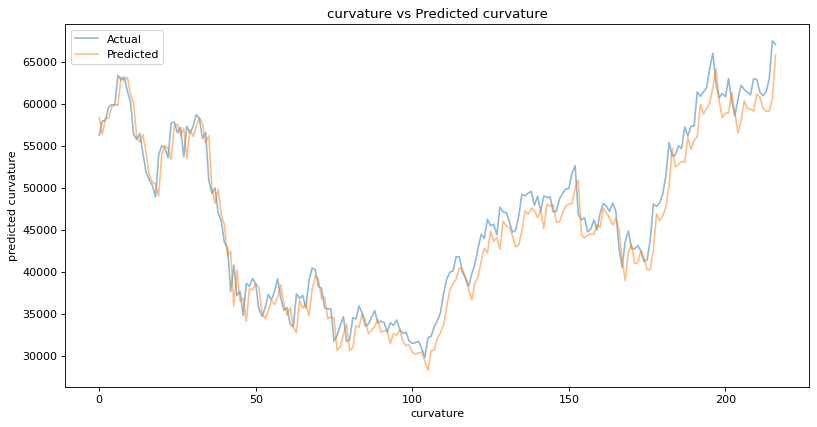

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("curvature")
plt.ylabel("predicted curvature")
plt.title("curvature vs Predicted curvature")
plt.legend()
plt.show()

#### Decision trees

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# randomFor = RandomForestRegressor()
decTree = DecisionTreeRegressor()
decTree.fit(X_train, y_train)
results_valid = decTree.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

15746518.153438296


0.8427088387771149

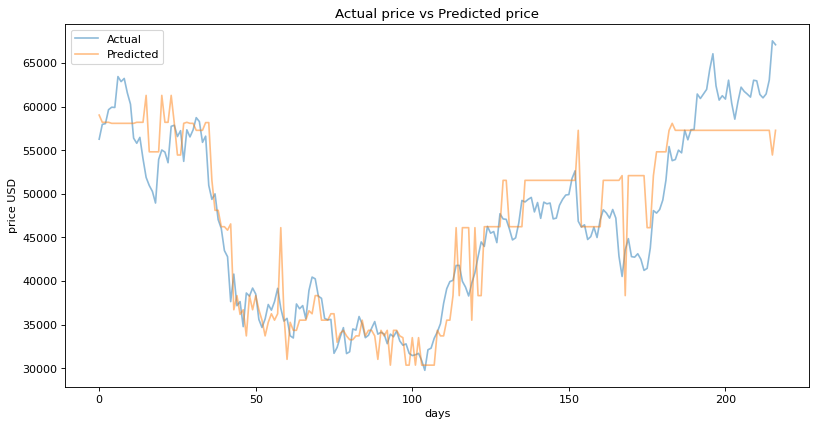

In [86]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Random Forest

In [87]:
randomFor = RandomForestRegressor()
randomFor.fit(X_train, y_train)
results_valid = randomFor.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

46665185.35608824


0.5338638598185859

In [88]:
y_valid.shape[0]

217

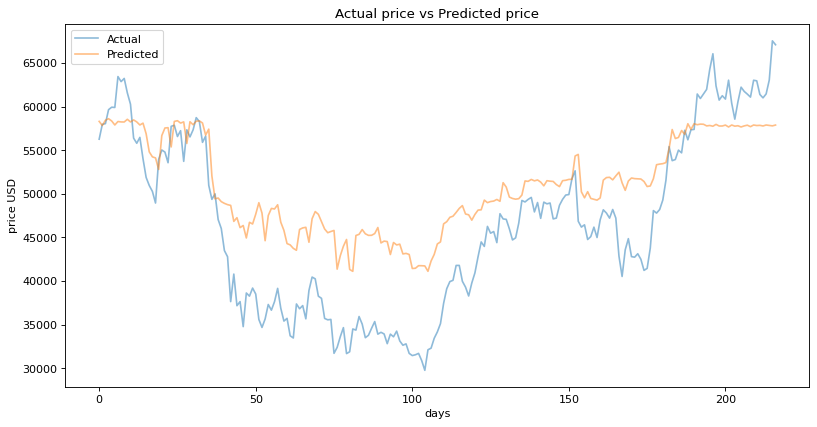

In [89]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid , label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Suport vector regressor

In [90]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train, y_train)
results_valid = SVR.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

2140236541.938693


-20.378712912459502

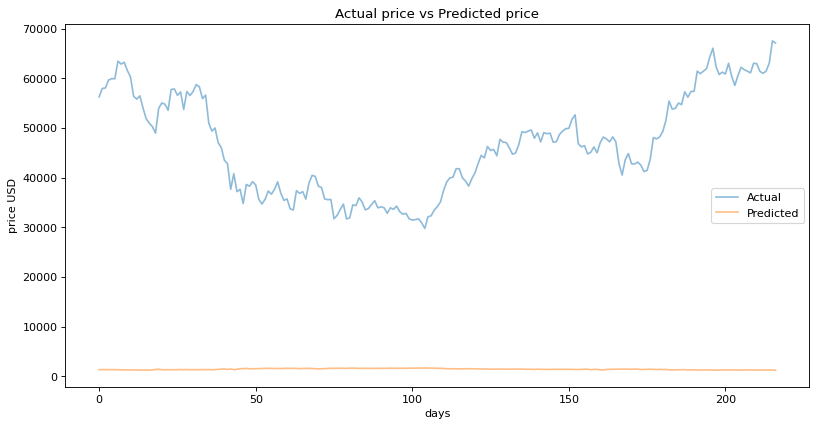

In [91]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Neural network

In [92]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
196/196 [==============================] - 0s 606us/step - loss: 82353040.0000
Epoch 2/50
196/196 [==============================] - 0s 617us/step - loss: 82340512.0000
Epoch 3/50
196/196 [==============================] - 0s 802us/step - loss: 82330744.0000
Epoch 4/50
196/196 [==============================] - 0s 847us/step - loss: 82321512.0000
Epoch 5/50
196/196 [==============================] - 0s 716us/step - loss: 82312384.0000
Epoch 6/50
196/196 [==============================] - 0s 655us/step - loss: 82303376.0000
Epoch 7/50
196/196 [==============================] - 0s 655us/step - loss: 82294456.0000
Epoch 8/50
196/196 [==============================] - 0s 716us/step - loss: 82285648.0000
Epoch 9/50
196/196 [==============================] - 0s 828us/step - loss: 82276728.0000
Epoch 10/50
196/196 [==============================] - 0s 711us/step - loss: 82267944.0000
Epoch 11/50
196/196 [==============================] - 0s 701us/step - loss: 82259136.0000
Epoch 12

In [93]:
results_valid = model.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

2263850023.6700115


-21.61348163370074

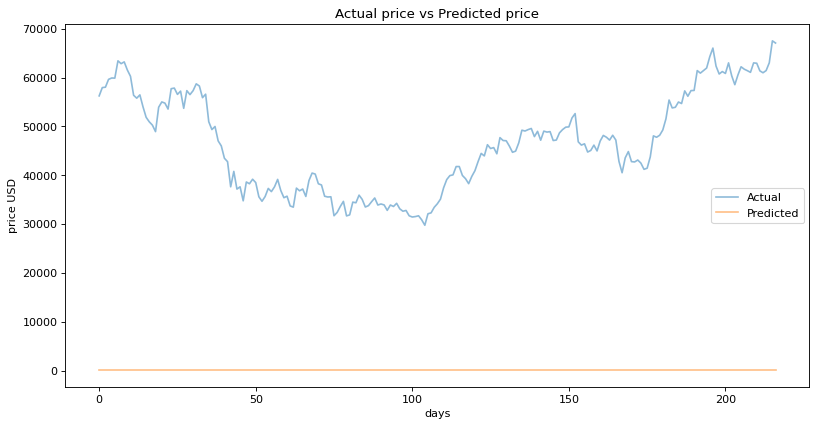

In [94]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

In [55]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test.values))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
#############################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

ValueError: Data must be 1-dimensional

In [ ]:
def make_dataset_from_ts(d, num_x=10, value=None):
    for idx in range(num_x):
        d['t-' + str(idx+1)] = d[value].shift(+(idx+1))
    return d[num_x:]

In [ ]:
btc_price = btc[['date', 'PriceUSD']]
btc_price = btc_price.dropna()

In [ ]:
btc_price.head()

In [ ]:
btc_price = make_dataset_from_ts(btc_price, num_x=1, value="PriceUSD")

In [ ]:
btc_price['log_diff'] = np.log(btc_price['PriceUSD']) - np.log(btc_price['t-1'])

In [ ]:
btc_price['change%'] = round(btc_price['log_diff']*100, 2)

In [ ]:
btc_price['target'] = [1 if btc_price > 0 else 0 for btc_price in btc_price['log_diff']]

In [ ]:
btc_price.head()

In [ ]:
years = [2010+year for year in range(12)]
print(years)


# **Change in price by year**

In [ ]:
#plot_btc = btc_price.set_index("date", inplace=True)
#print(plot_btc)
btc_price['PriceUSD'].plot()

In [ ]:
for el in years:
    print(""+ str(el)+ " in USD: Mean price: " + str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean(), 2)) +
        ",  Variance: " +str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].std(), 2)))
    if years.index(el) !=0:
        V1 = btc_price[btc_price['year'] == str(el-1)]['PriceUSD'].mean()
        V2 = btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean()
    print("Price change: " + str(round((V2 - V1)/abs(V1) * 100, 2)) + " %")


# **Daily predictive power of the crypto**

**Daily return difference by year**

```
# This is formatted as code
```

**

In [ ]:

#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)


fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
    btc_price[btc_price['year'] == str(el)].hist('log_diff', ax=axes[idx])
    axes[idx].set_title(str(el))


# **TIME SERIES ANALYSIS**

**Autocorrelation**

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
    plot_acf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
    axes[idx].set_title(str(el))

**Partial Autocorrelation**

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_pacf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Autocorrelation and Partial Autocorrelation for the whole time**

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1,figsize=(8, 4))
plot_acf(btc_price['PriceUSD'],  lags=30, ax=ax1)
axes[idx].set_title("Autocorrelation")
plot_pacf(btc_price['PriceUSD'],  lags=30, ax=ax2)
axes[idx].set_title("Parcial autocorrelation")

In [ ]:
fig, ((ax1)) = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(btc_price['PriceUSD'], ax = ax1)

In [ ]:
btc_price.head()

In [ ]:
btc_price['PriceUSD']

Prediction


In [ ]:
btc_price['PriceUSD']

In [ ]:
btc_price['PriceUSD']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

# **SOURCES:**


*   https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
*   https://pythondata.com/forecasting-time-series-autoregression/
* https://otexts.com/fpp2/what-can-be-forecast.html
